In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
!head ../data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [46]:
df = pd.read_csv('../data/sales_data.csv', parse_dates=['Date'])

In [47]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [48]:
print(df.shape)

(113036, 18)


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [50]:
print(df.describe())

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

In [51]:
"""Numerical analysis and plotting"""
df.Unit_Cost.describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [52]:
df.Unit_Cost.mean()

267.296365759581

In [53]:
df.Unit_Cost.median()

9.0

<AxesSubplot:>

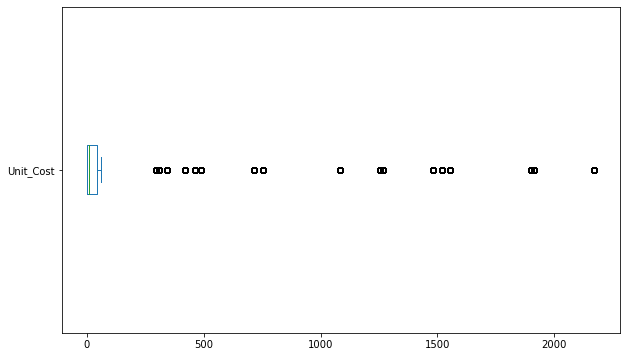

In [54]:
df.Unit_Cost.plot(kind='box', vert=False, figsize=(10,6))   # Box plot

<AxesSubplot:ylabel='Density'>

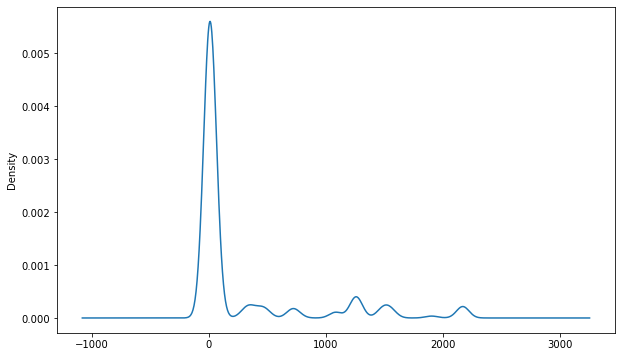

In [55]:
df.Unit_Cost.plot(kind='density', figsize=(10,6))   # Density plot

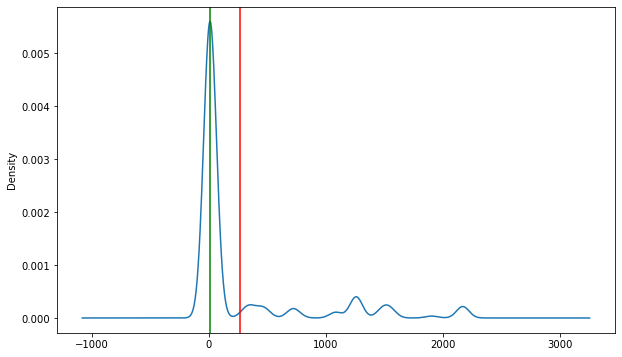

In [56]:
ax = df.Unit_Cost.plot(kind='density', figsize=(10,6))   # kde: kernel density estimation
ax.axvline(df.Unit_Cost.mean(), color='r')
ax.axvline(df.Unit_Cost.median(), color='g')

Text(0.5, 0, 'Dollars')

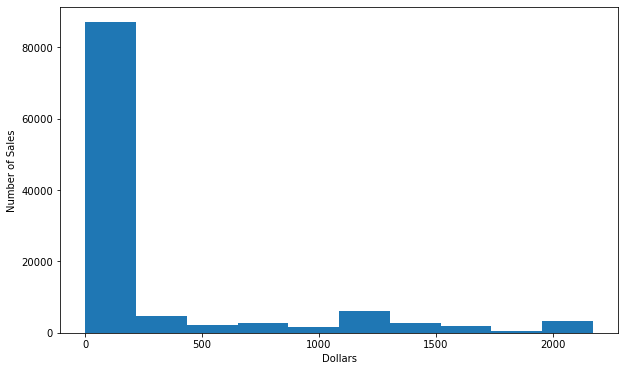

In [57]:
ax = df.Unit_Cost.plot(kind='hist', figsize=(10,6))   # Histogram
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

In [58]:
"""Categorical analysis and plotting"""
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [59]:
df.Age_Group.value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

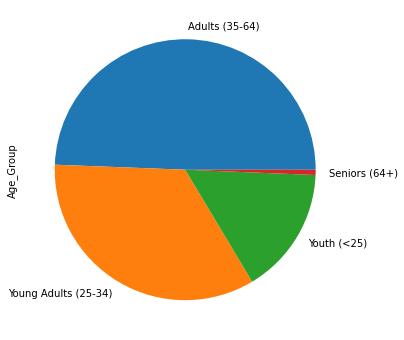

In [60]:
df.Age_Group.value_counts().plot(kind='pie', figsize=(10,6))   # Pie chart

In [61]:
import seaborn as sns

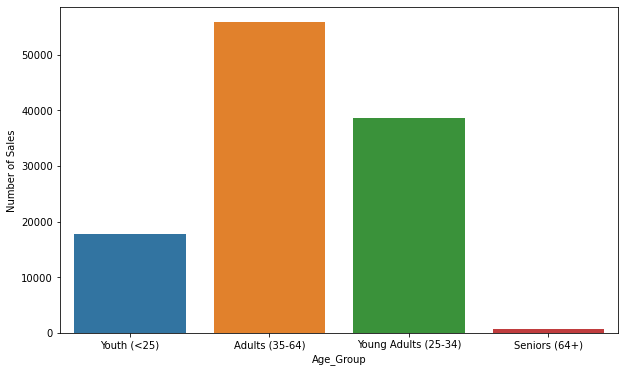

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age_Group', data=df).set_ylabel('Number of Sales')
plt.show()

In [63]:
"""Relationship analysis"""
corr = df.corr()
print(corr)

                     Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.00

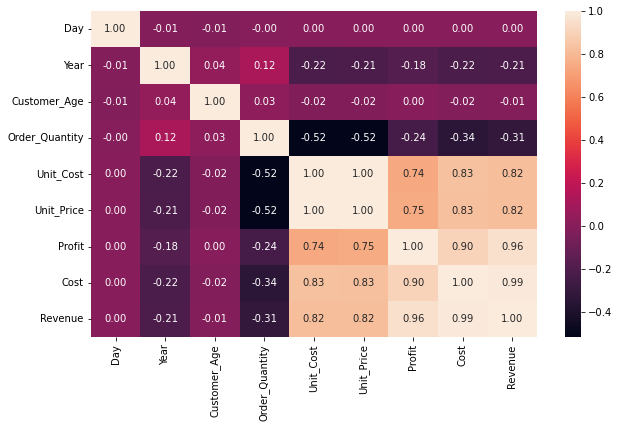

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

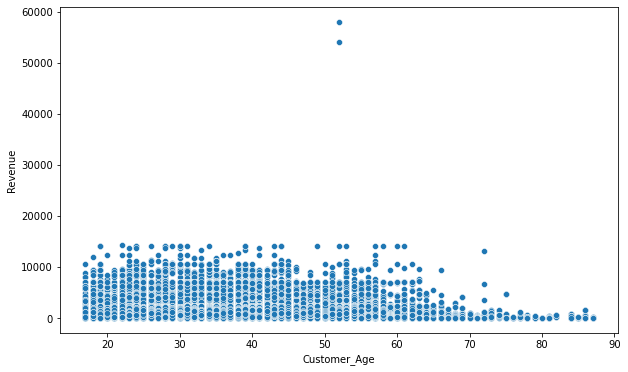

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Customer_Age', y='Revenue', data=df)
plt.show()

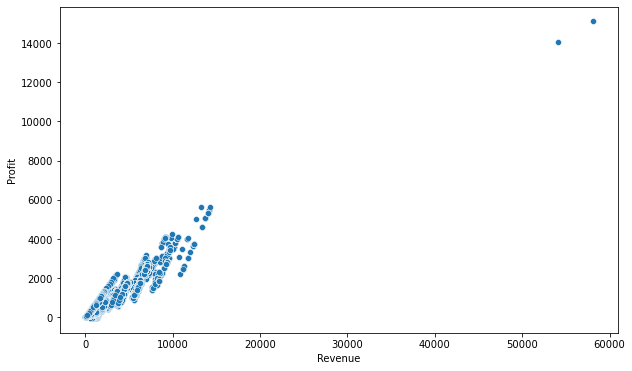

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Revenue', y='Profit', data=df)
plt.show()

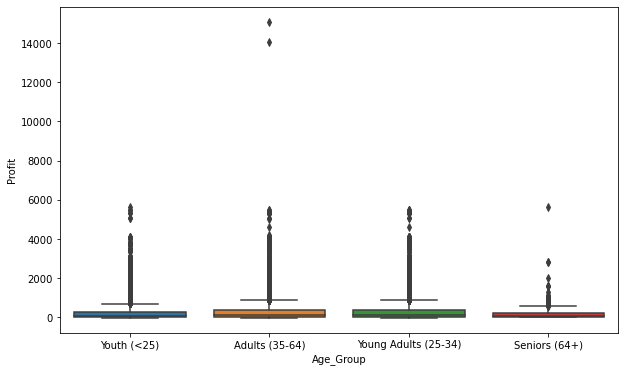

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group', y='Profit', data=df)
plt.show()

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

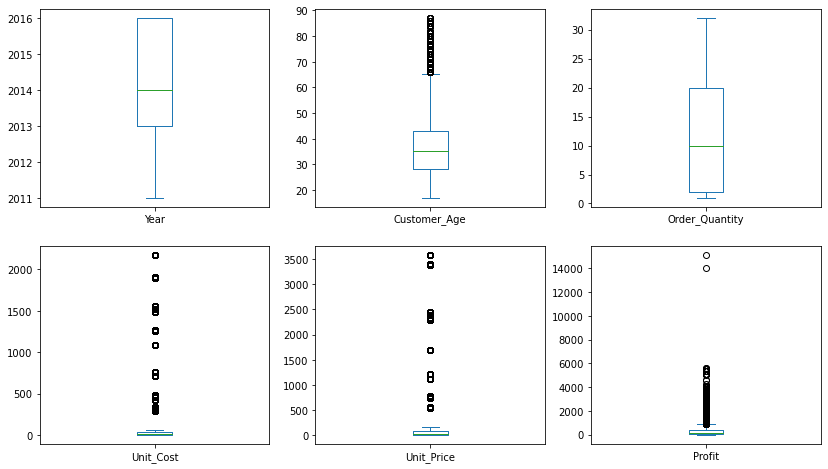

In [68]:
columns = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
df[columns].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [69]:
"""Column Wrangling: create new columns or modify existing columns"""
# add a new column Revenue_Per_Age and calculate it
df['Revenue_Per_Age'] = df.Revenue / df.Customer_Age
df.Revenue_Per_Age.head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_Per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

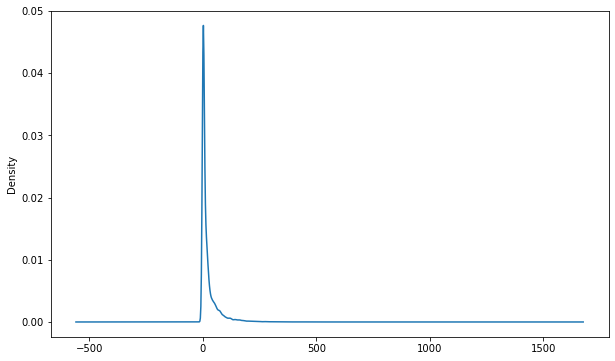

In [70]:
df.Revenue_Per_Age.plot(kind='density', figsize=(10,6))

<AxesSubplot:ylabel='Frequency'>

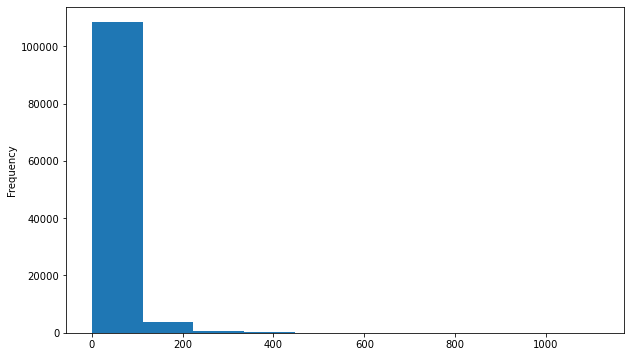

In [71]:
df.Revenue_Per_Age.plot(kind='hist', figsize=(10,6))    # Histogram

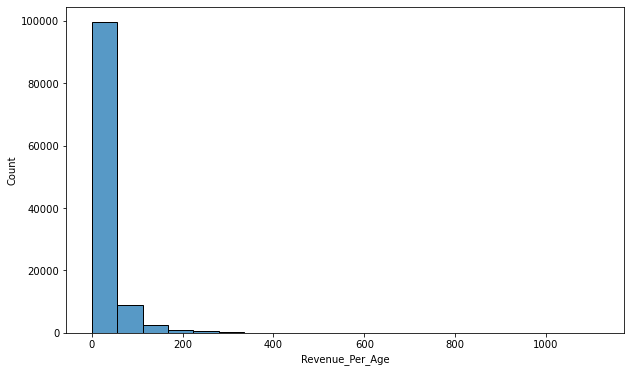

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(df.Revenue_Per_Age, bins=20)
plt.show()

In [73]:
"""Add a new column Calculated_Cost and calculate it"""
# Calcuulated_Cost = Unit_Cost * Order_Quantity
df['Calculated_Cost'] = df.Order_Quantity * df.Unit_Cost
df.Calculated_Cost.head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [74]:
(df.Calculated_Cost != df.Cost).sum()

0

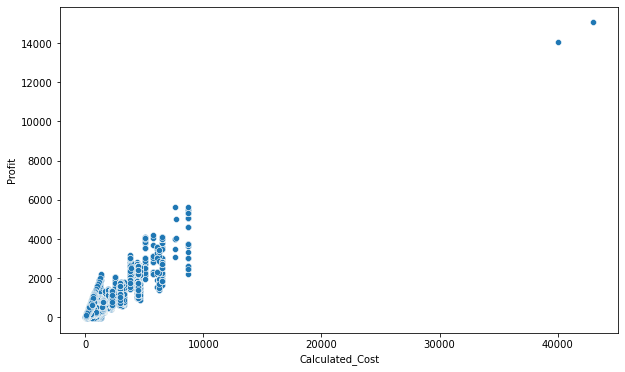

In [77]:
# check the relationship between cost and profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Calculated_Cost', y='Profit', data=df)
plt.show()

In [82]:
"""Add a new column Calculated_Revenue and calculate it"""
# Calculated_Revenue = Cost + Profit
df['Calculated_Revenue'] = df.Cost + df.Profit
df.Calculated_Revenue.head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [83]:
(df.Calculated_Revenue != df.Revenue).sum()

0

In [84]:
print(df.head())

        Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category  ...  \
0               M     Canada  British Columbia      Accessories  ...   
1               M     Canada  British Columbia      Accessories  ...   
2               M  Australia   New South Wales      Accessories  ...   
3               M  Australia   New South Wales      Accessories  ...   
4               F  Australia   New South Wales      Accessories  ...   

               Product Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike              8         45         120     590   360   
1  Hitch

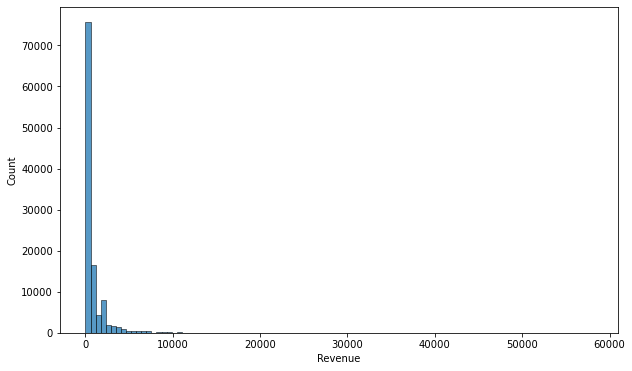

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(df.Revenue, bins=100)
plt.show()

In [87]:
"""Modify all Unit_Price values and add a 3% tax"""
df.Unit_Price.head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [88]:
df.Unit_Price *= 1.03

In [89]:
df.Unit_Price.head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [92]:
# rename State to Province/State
df.rename(columns={'State': 'Province/State'}, inplace=True)

In [93]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Province/State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_Per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,123.6,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,123.6,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,123.6,238,180,418,8.893617,180,418


In [96]:
df.rename(columns={'Province/State': 'Province_State'}, inplace=True)

In [97]:
"""Selection and Indexing"""
# get all the sales made in the Province of Ontario
df.loc[df.Province_State == 'Ontario']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Province_State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_Per_Age,Calculated_Cost,Calculated_Revenue
12188,2013-08-08,8,August,2013,20,Youth (<25),F,Canada,Ontario,Accessories,...,Road Bottle Cage,15,3,9.27,71,45,116,5.80,45,116
12189,2015-08-08,8,August,2015,20,Youth (<25),F,Canada,Ontario,Accessories,...,Road Bottle Cage,14,3,9.27,66,42,108,5.40,42,108
26942,2013-08-08,8,August,2013,20,Youth (<25),F,Canada,Ontario,Accessories,...,Fender Set - Mountain,21,8,22.66,229,168,397,19.85,168,397
26943,2015-08-08,8,August,2015,20,Youth (<25),F,Canada,Ontario,Accessories,...,Fender Set - Mountain,18,8,22.66,197,144,341,17.05,144,341
95492,2013-08-08,8,August,2013,20,Youth (<25),F,Canada,Ontario,Accessories,...,Patch Kit/8 Patches,25,1,2.06,18,25,43,2.15,25,43
95493,2015-08-08,8,August,2015,20,Youth (<25),F,Canada,Ontario,Accessories,...,Patch Kit/8 Patches,23,1,2.06,17,23,40,2.00,23,40


In [99]:
df_canada = df.loc[df.Country == 'Canada']

In [100]:
df_canada.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Province_State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_Per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,5,45,123.6,369,225,594,20.482759,225,594
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,7,45,123.6,517,315,832,28.689655,315,832
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,2,45,123.6,148,90,238,8.206897,90,238


get the mean revenue of the adults (35-64)

In [104]:
df_canada.loc[df_canada.Age_Group == 'Adults (35-64)', 'Revenue'].mean()

616.0251466890193

In [105]:
df.loc[df.Age_Group == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

how many records belong to Age_Group youth (<25) or Adults (35-64)?

In [108]:
df_canada.loc[(df_canada.Age_Group == 'Youth (<25)') | (df_canada.Age_Group == 'Adults (35-64)')].shape[0]

9484

In [109]:
df.loc[(df.Age_Group == 'Youth (<25)') | (df.Age_Group == 'Adults (35-64)')].shape[0]

73652

get the mean revenue of the adults (35-64) in Canada and United States

In [113]:
df.loc[(df.Age_Group == 'Adults (35-64)') & (df.Country == 'Canada'), 'Revenue'].mean()

616.0251466890193

In [114]:
df.loc[(df.Age_Group == 'Adults (35-64)') & (df.Country == 'United States'), 'Revenue'].mean()

726.7260473588342

In [115]:
# increase the revenue by 10% to every sale made in France
df.loc[df.Country == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [118]:
df.loc[df.Country == 'France', 'Revenue'] *= 1.1

In [119]:
df.loc[df.Country == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64